In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from difflib import SequenceMatcher
import re
from function import fuzzy_merge

In [24]:
pd.set_option('display.max_columns', None)

In [25]:
# df_data_base = pd.read_csv("../data/originals/PROD_TERMIN.csv")
# df_data_base = pd.read_csv("../data/originals/PROD_TERMIN_ART.csv")
df_data_base = pd.read_csv("../data/originals/PROD_TERMIN_ART_SIN_9.csv")
df_data_base_imp = pd.read_csv("../data/originals/FACTOR_IMPACTO.csv")
df_new_data = pd.read_csv("../data/process/all_data_api.csv")

In [26]:
df_data_base["TITULO"] = df_data_base["TITULO"].str.lower().str.strip().str.replace(":", "").str.replace("-", "")

In [27]:
df_data_base["TITULO"].nunique()

4144

In [28]:
df_data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4544 entries, 0 to 4543
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   IDDECINVPROYECTOPRODTERMIN    4544 non-null   int64  
 1   IDDECINVPROYECTO              4542 non-null   float64
 2   IDDECINVTIPOPRODUCTOESPERADO  4544 non-null   int64  
 3   TITULO                        4544 non-null   object 
 4   ANIO                          4544 non-null   int64  
 5   VOLUMEN                       4341 non-null   float64
 6   PAGINAS                       4323 non-null   object 
 7   NOMBREREVISTA                 3986 non-null   object 
 8   ISINDEX                       4065 non-null   float64
 9   BDREVISTA                     3842 non-null   float64
 10  ISSN                          3997 non-null   object 
 11  FACTIMPACTO                   908 non-null    object 
 12  EDITORIAL                     353 non-null    object 
 13  EST

In [29]:
df_data_base["TITULO"].nunique(), "Total no vacio de titulo:", df_data_base[~df_data_base["TITULO"].isna()].shape[0]

(4144, 'Total no vacio de titulo:', 4544)

In [30]:
df_data_base["DOI"].nunique(), "Total no vacio de DOI:", df_data_base[~df_data_base["DOI"].isna()].shape[0]

(2529, 'Total no vacio de DOI:', 2735)

In [31]:
col_to_review = "TITULO"
# col_to_review = "DOI"

In [32]:
count = 0
for value in df_data_base[col_to_review].value_counts()[df_data_base[col_to_review].value_counts() > 1].values:
    count += value
count

np.int64(767)

In [33]:
list_df_data_base_unique_one = df_data_base[col_to_review].value_counts()[df_data_base[col_to_review].value_counts() < 2].keys()

In [34]:
df_data_base[df_data_base[col_to_review].isin(list_df_data_base_unique_one)].shape

(3777, 58)

In [35]:
df_data_base[col_to_review].value_counts()[df_data_base[col_to_review].value_counts() < 2].shape[0] + count

np.int64(4544)

In [36]:
(df_data_base[col_to_review].value_counts()[df_data_base[col_to_review].value_counts() > 1])

TITULO
evidence of reduced mercury loss and increased use of cyanidation at gold processing centers in southern ecuador                     6
aplicación de gráficos de control para detectar anomalías en la mortalidad de niños en ecuador                                       4
overcoming limitations of polymer additive manufacturing for snapfit joint design and part assembly                                  4
flood models an exploratory analysis and research trends                                                                             3
federated learning enables big data for rare cancer boundary detection                                                               3
                                                                                                                                    ..
an exploration of crime prediction using data mining on open data                                                                    2
hongos endófitos foliares como candidatos a bioc

In [37]:
# df_data_base[df_data_base["TITULO"] == "THERMAL IMAGE SUPERRESOLUTION THROUGH DEEP CONVOLUTIONAL NEURAL NETWORK"]
# df_data_base[df_data_base["DOI"] == "10.1109/IROS.2016.7759059"]
df_data_base[df_data_base["TITULO"] == "FOLLICULAR ENVIRONMENT AS A PREDICTIVE TOOL FOR EMBRYO DEVELOPMENT AND KINETICS IN CATTLE"]


,IDDECINVPROYECTOPRODTERMIN,IDDECINVPROYECTO,IDDECINVTIPOPRODUCTOESPERADO,TITULO,ANIO,VOLUMEN,PAGINAS,NOMBREREVISTA,ISINDEX,BDREVISTA,ISSN,FACTIMPACTO,EDITORIAL,ESTADOPUBLICACION,ESPECIFICACION,URL,ULTIMO_CAMBIO,NEVENTO,LEVENTO,FEVENTO,ADJUNTO,FECHAPUBLICACION,RESUMEN,KEYS,ASIST_OBJETIV,INNOVA_VERIFIC,LOGROS_SISTEMAC,RETOS_COMUNIC,IDUNIDAD,TIPOLAB,MARCA,MODELO,SERIE,INVENTARIO,ESTADO,FRECUENCIA,FVENCIMIENTO,SJR,CUARTIL,IDDECINVREVISTA,APROBADO,IDDECINVMOTIVOPRODTERMIN,OBSERVACIONARPOB,IDPUBLICACIONPERSONA,ADJUNTO2,ADJUNTO3,ADJUNTO4,CODIGOPRODUCTO,TIPOTESIS,REVISIONPARES,DOI,INVENTOR,SUBCLASE,URLREVISTA,MATERIAINTEGRADORA,NUMEROSOLICITUD,OBJGENERAL,ESTAELIMINADO


In [38]:
df_data_base_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   IDDECINVPRODUCTOFACTORIMPACTO  985 non-null    int64 
 1   IDDECINVPROYECTOPRODTERMIN     985 non-null    int64 
 2   NOMBREINDEXACION               985 non-null    object
 3   FACTORIMPACTO                  929 non-null    object
 4   CUARTIL                        985 non-null    object
 5   ESPRIMERDECIL                  985 non-null    object
 6   ULTIMO_CAMBIO                  985 non-null    object
dtypes: int64(2), object(5)
memory usage: 54.0+ KB


In [39]:
df_new_data["title"].nunique()

4588

In [40]:
df_new_data["title_cp"] = df_new_data["title"]
df_new_data["title"] = df_new_data["title"].str.lower().str.strip().str.replace(":", "").str.replace("-", "")
df_new_data["TITULO"] = df_new_data["title"]

In [41]:
df_new_data["TITULO"].nunique()

4580

In [42]:
df_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4605 entries, 0 to 4604
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url                        4605 non-null   object 
 1   doi                        4239 non-null   object 
 2   url_doi                    4239 non-null   object 
 3   eid                        4605 non-null   object 
 4   title                      4605 non-null   object 
 5   abstract                   4494 non-null   object 
 6   key_words                  3953 non-null   object 
 7   cuartil                    0 non-null      float64
 8   volume                     3694 non-null   object 
 9   authors                    4582 non-null   object 
 10  affiliations               4582 non-null   float64
 11  issn                       3839 non-null   object 
 12  magazine                   3664 non-null   object 
 13  citeScore                  3516 non-null   float

In [43]:
df_new_data["TITULO"].nunique()

4580

In [44]:
# *********************************************************
# resultado_SequenceMatcher = fuzzy_merge(df_data_base, df_new_data, 'TITULO', 'title', umbral_similitud=0.7)
# 3 horas

In [45]:
# resultado_SequenceMatcher.to_csv("./resultado_SequenceMatcher.csv", index=False)
# *********************************************************

In [46]:
# Está mal porque que TITULO aparezca no significa que sea único, sino que la data df_new_data proveniente de la API 
# tiene la información de TITULO, pero no necesariamente esta en df_data_base es decir no necesariamente esta en base, es toda
# la data que se obtuvo de la API.
# result = pd.merge(df_new_data, df_data_base, on="TITULO", how="left", suffixes=("_original", "_update"))

# hace el merge pero los valores de titulo proveniente de df_new_data es la real ya que TITULO conserva la información de df_data_base
# result = pd.merge(df_data_base, df_new_data, on="TITULO", how="left", suffixes=("_original", "_update"))
result = pd.merge(df_data_base, df_new_data, on="TITULO", how="inner", suffixes=("_original", "_update"))

In [47]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 84 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   IDDECINVPROYECTOPRODTERMIN    2355 non-null   int64  
 1   IDDECINVPROYECTO              2355 non-null   float64
 2   IDDECINVTIPOPRODUCTOESPERADO  2355 non-null   int64  
 3   TITULO                        2355 non-null   object 
 4   ANIO                          2355 non-null   int64  
 5   VOLUMEN                       2324 non-null   float64
 6   PAGINAS                       2316 non-null   object 
 7   NOMBREREVISTA                 2244 non-null   object 
 8   ISINDEX                       2257 non-null   float64
 9   BDREVISTA                     2149 non-null   float64
 10  ISSN                          2136 non-null   object 
 11  FACTIMPACTO                   591 non-null    object 
 12  EDITORIAL                     84 non-null     object 
 13  EST

In [48]:
print(result["TITULO"].nunique(), "Total no vacio de titulo:", result[~result["TITULO"].isna()].shape[0])
print(result["title"].nunique(), "Total no vacio de titulo:", result[~result["title"].isna()].shape[0])

2076 Total no vacio de titulo: 2355
2076 Total no vacio de titulo: 2355


In [49]:
result["TITULO"].value_counts()

TITULO
building academic branding the digital branding as academic footprint                                                                                                           4
adaptive evacuation management system based on monitoring techniques                                                                                                            4
humanmachine musical composition in realtime based on emotions through a fuzzy logic approach                                                                                   4
overcoming limitations of polymer additive manufacturing for snapfit joint design and part assembly                                                                             4
development of sociodemographic indicators for modeling the household solid waste generation in guayaquil (ecuador) quantification, characterization and energy valorization    3
                                                                                                       

In [50]:
result.keys()

Index(['IDDECINVPROYECTOPRODTERMIN', 'IDDECINVPROYECTO',
       'IDDECINVTIPOPRODUCTOESPERADO', 'TITULO', 'ANIO', 'VOLUMEN', 'PAGINAS',
       'NOMBREREVISTA', 'ISINDEX', 'BDREVISTA', 'ISSN', 'FACTIMPACTO',
       'EDITORIAL', 'ESTADOPUBLICACION', 'ESPECIFICACION', 'URL',
       'ULTIMO_CAMBIO', 'NEVENTO', 'LEVENTO', 'FEVENTO', 'ADJUNTO',
       'FECHAPUBLICACION', 'RESUMEN', 'KEYS', 'ASIST_OBJETIV',
       'INNOVA_VERIFIC', 'LOGROS_SISTEMAC', 'RETOS_COMUNIC', 'IDUNIDAD',
       'TIPOLAB', 'MARCA', 'MODELO', 'SERIE', 'INVENTARIO', 'ESTADO',
       'FRECUENCIA', 'FVENCIMIENTO', 'SJR', 'CUARTIL', 'IDDECINVREVISTA',
       'APROBADO', 'IDDECINVMOTIVOPRODTERMIN', 'OBSERVACIONARPOB',
       'IDPUBLICACIONPERSONA', 'ADJUNTO2', 'ADJUNTO3', 'ADJUNTO4',
       'CODIGOPRODUCTO', 'TIPOTESIS', 'REVISIONPARES', 'DOI', 'INVENTOR',
       'SUBCLASE', 'URLREVISTA', 'MATERIAINTEGRADORA', 'NUMEROSOLICITUD',
       'OBJGENERAL', 'ESTAELIMINADO', 'url', 'doi', 'url_doi', 'eid', 'title',
       'abstract',

In [51]:
col_indicadora_match = "doi" # 4290
col_indicadora_match = "title" # 4657


if col_indicadora_match and not result.empty:
    df_matched = result[~result[col_indicadora_match].isna()].copy()
else:
    df_matched = pd.DataFrame() # DataFrame vacío si no hay indicador o result está vacío


# print(f"### Información del DataFrame 'result' ###")
# result.info()
print(f"\n### Información del DataFrame 'df_matched' ###")
if not df_matched.empty:
    df_matched.info()
else:
    print("df_matched está vacío.")


### Información del DataFrame 'df_matched' ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 84 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   IDDECINVPROYECTOPRODTERMIN    2355 non-null   int64  
 1   IDDECINVPROYECTO              2355 non-null   float64
 2   IDDECINVTIPOPRODUCTOESPERADO  2355 non-null   int64  
 3   TITULO                        2355 non-null   object 
 4   ANIO                          2355 non-null   int64  
 5   VOLUMEN                       2324 non-null   float64
 6   PAGINAS                       2316 non-null   object 
 7   NOMBREREVISTA                 2244 non-null   object 
 8   ISINDEX                       2257 non-null   float64
 9   BDREVISTA                     2149 non-null   float64
 10  ISSN                          2136 non-null   object 
 11  FACTIMPACTO                   591 non-null    object 
 12  EDITORIAL     

In [52]:
df_matched["title"].nunique(), df_matched["TITULO"].nunique()

(2076, 2076)

In [53]:
df_matched.head()

,IDDECINVPROYECTOPRODTERMIN,IDDECINVPROYECTO,IDDECINVTIPOPRODUCTOESPERADO,TITULO,ANIO,VOLUMEN,PAGINAS,NOMBREREVISTA,ISINDEX,BDREVISTA,ISSN,FACTIMPACTO,EDITORIAL,ESTADOPUBLICACION,ESPECIFICACION,URL,ULTIMO_CAMBIO,NEVENTO,LEVENTO,FEVENTO,ADJUNTO,FECHAPUBLICACION,RESUMEN,KEYS,ASIST_OBJETIV,INNOVA_VERIFIC,LOGROS_SISTEMAC,RETOS_COMUNIC,IDUNIDAD,TIPOLAB,MARCA,MODELO,SERIE,INVENTARIO,ESTADO,FRECUENCIA,FVENCIMIENTO,SJR,CUARTIL,IDDECINVREVISTA,APROBADO,IDDECINVMOTIVOPRODTERMIN,OBSERVACIONARPOB,IDPUBLICACIONPERSONA,ADJUNTO2,ADJUNTO3,ADJUNTO4,CODIGOPRODUCTO,TIPOTESIS,REVISIONPARES,DOI,INVENTOR,SUBCLASE,URLREVISTA,MATERIAINTEGRADORA,NUMEROSOLICITUD,OBJGENERAL,ESTAELIMINADO,url,doi,url_doi,eid,title,abstract,key_words,cuartil,volume,authors,affiliations,issn,magazine,citeScore,citations_scopus_count,language,coverDate,publication_year,page_raw,page_count,scimago_factor_SJR,scimago_SJR_Best_Quartile,eid_original_input,error_message,año,title_cp
0,2304,0.0,1,experimental studies of forward and backward w...,2018,100.0,12,MECHANICAL SYSTEMS AND SIGNAL PROCESSING,1.0,2.0,"08883270, 10961216",NaN,NaN,1.0,NaN,http://doi.org/10.1016/j.ymssp.2017.07.014,2023-02-17-09.41.16.962091,NaN,NaN,NaN,1-s2.0-s0888327017303746-main.pdf,2018-02-07,IN THIS WORK WE INVESTIGATE FORWARD AND BACKWA...,DRILL-STRING DYNAMICS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,887",Q1,1544.0,N,1661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,NaN,NaN,N,https://www.scopus.com/record/display.uri?eid=...,10.1016/j.ymssp.2017.07.014,https://doi.org/10.1016/j.ymssp.2017.07.014,2-s2.0-85028717177,experimental studies of forward and backward w...,In this work we investigate forward and backwa...,"Co-existing attractors, Drill-string dynamics,...",NaN,100,Joseph Páez Chávez,60072061.0,10961216,Mechanical Systems and Signal Processing,14.8,75.0,English,2018-02-01,2018.0,454-465,11.0,"2,636",Q1,2-s2.0-85028717177,NaN,2018.0,Experimental studies of forward and backward w...
1,2306,0.0,1,a characterization of the distance between con...,2018,2018.0,7,2018 23RD INTERNATIONAL CONFERENCE ON METHODS ...,1.0,2.0,978-1-5386-4325-9,NaN,NaN,1.0,NaN,http://dx.doi.org/10.1109/MMAR.2018.8486092,2023-02-17-09.35.16.560803,23RD INTERNATIONAL CONFERENCE ON METHODS AND M...,"MIĘDZYZDROJE, POLAND",2018-08-22,abcotdbcauls - journal.pdf,NaN,THE CONTROLLABILITY DISTANCE FOR A LINEAR TIME...,CONTROL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,2",Q2,0.0,N,1663.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,NaN,NaN,N,https://www.scopus.com/record/display.uri?eid=...,10.1109/MMAR.2018.8486092,https://doi.org/10.1109/MMAR.2018.8486092,2-s2.0-85056480828,a characterization of the distance between con...,The controllability distance for a linear time...,NaN,NaN,NaN,Joseph Paez Chavez,60072061.0,NaN,NaN,NaN,0.0,English,2018-10-08,2018.0,664-667,3.0,NaN,NaN,2-s2.0-85056480828,NaN,2018.0,A Characterization of the Distance between Con...
2,2314,106.0,1,a prefeasibility experimental study of using s...,2019,158.0,1502-1507,ENERGY PROCEDIA,1.0,2.0,18766102,NaN,NaN,1.0,NaN,https://www.sciencedirect.com/science/article/...,2019-03-27-14.19.20.664357,NaN,NaN,NaN,1-s2.0-s1876610219303789-main.pdf,2019-02-28,THE AIM OF THIS STUDY IS TO DETERMINE THE FEAS...,"SURFACE-ENHANCED FLAKE GRAPHITE, PEFC, BIPOLAR...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,378",Q2,10615.0,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTTPS://DOI.ORG/10.1016/J.EGYPRO.2019.01.358,NaN,0,NaN,N,NaN,NaN,N,https://www.scopus.com/record/display.uri?eid=...,10.1016/j.egypro.2019.01.358,https://doi.org/10.1016/j.egypro.2019.01.358,2-s2.0-85063542810,a prefeasibility experimental study of using s...,The aim of this study is to determine the feas...,"Bipolar plates, Nanp graphite, PEFC, Surface-e...",NaN,158,"José Diaz, Andrés Rigail-Cedeño, Mayken Espino...",60072061.0,18766102,Energy Procedia,4.4,11.0,English,2019-01-01,2019.0,1502-1507,5.0,NaN,NaN,2-s2.0-85063542810,NaN,2019.0,A pre-feasibility experimental study of usin

In [54]:
df_matched[["magazine", "EDITORIAL", "BDREVISTA"]]

,magazine,EDITORIAL,BDREVISTA
0,Mechanical Systems and Signal Processing,NaN,2.0
1,NaN,NaN,2.0
2,Energy Procedia,NaN,2.0
3,Energy Procedia,NaN,2.0
4,NaN,NaN,3.0
...,...,...,...
2350,Proceedings of the National Academy of Science...,NaN,2.0
2351,Proceedings of the Royal Society A: Mathematic...,NaN,2.0
2352,Applied Mathematical Modelling,NaN,2.0
2353,Meccanica,NaN,2.0


In [55]:
df_matched["BDREVISTA"].unique()

array([2.000e+00, 3.000e+00, 1.000e+00,       nan, 8.000e+00, 9.000e+00,
       0.000e+00, 1.000e+01, 3.801e+03, 3.799e+03, 6.000e+00, 5.000e+00,
       3.800e+03])

### Analisis de textos que no coinciden

In [56]:
# Filas en api que NO están en df_all (basado en TITULO)
# Lo del API que no esta en el de base de datos
df_api_no_match = df_new_data[~df_new_data['TITULO'].isin(df_matched['title'].unique())].copy()

# Filas en df_all que NO están en df_scrap (basado en TITULO)
df_all_no_match = df_data_base[~df_data_base['TITULO'].isin(df_matched['TITULO'].unique())].copy()

# print("\n### df_api_no_match (Primeras 5 filas) ###")
# print(df_api_no_match.head())
print(f"Total de filas en df_api_no_match: {len(df_api_no_match)}")
print(f"Total de filas que deberian coincidir desde API: {len(df_new_data) - len(df_api_no_match)}")

# print("\n### df_all_no_match (Primeras 5 filas) ###")
# print(df_all_no_match.head())
print(f"Total de filas en df_all_no_match: {len(df_all_no_match)}")
print(f"Total de filas que deberian coincidir desde base: {len(df_data_base) - len(df_all_no_match)}")

Total de filas en df_api_no_match: 2517
Total de filas que deberian coincidir desde API: 2088
Total de filas en df_all_no_match: 2204
Total de filas que deberian coincidir desde base: 2340


In [57]:
df_api_no_match["title"].iloc[0]

'pathogenicity of white spot syndrome virus on postlarvae and juveniles of penaeus (litopenaeus) vannamei'

In [58]:
# Función para limpiar y normalizar texto
def limpiar_texto(texto):
    if pd.isna(texto):
        return ""
    # Convertir a minúsculas y eliminar caracteres especiales
    texto = str(texto).lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

# Función para calcular similitud entre textos
def similitud_texto(texto1, texto2):
    return SequenceMatcher(None, texto1, texto2).ratio()

# Función para buscar coincidencias
def buscar_coincidencias(df_api, df_bd, umbral_similitud=0.7):
    """
    Busca coincidencias entre títulos de dos dataframes
    
    Parámetros:
    - df_api: DataFrame del API con columna 'titulo'
    - df_bd: DataFrame de BD con columna 'TITULO'
    - umbral_similitud: Umbral mínimo de similitud (0.7 = 70%)
    """
    
    resultados = []
    
    for idx_api, row_api in df_api.iterrows():
        titulo_api = limpiar_texto(row_api.get('title', ''))
        
        if not titulo_api:
            continue
            
        mejores_coincidencias = []
        
        for idx_bd, row_bd in df_bd.iterrows():
            titulo_bd = limpiar_texto(row_bd.get('TITULO', ''))
            
            if not titulo_bd:
                continue
            
            # Verificar si uno contiene al otro
            contiene = titulo_api in titulo_bd or titulo_bd in titulo_api
            
            # Calcular similitud
            similitud = similitud_texto(titulo_api, titulo_bd)
            
            # Si hay coincidencia por contenido o alta similitud
            if contiene or similitud >= umbral_similitud:
                mejores_coincidencias.append({
                    'idx_bd': idx_bd,
                    'titulo_bd_original': row_bd.get('TITULO', ''),
                    'titulo_bd_limpio': titulo_bd,
                    'similitud': similitud,
                    'contiene': contiene,
                    'tipo_coincidencia': 'Contiene' if contiene else f'Similitud {similitud:.2%}'
                })
        
        if len(mejores_coincidencias) > 0:

            # Ordenar por similitud descendente
            mejores_coincidencias.sort(key=lambda x: x['similitud'], reverse=True)
            
            # Agregar resultado
            resultado = {
                'idx_api': idx_api,
                'titulo_api_original': row_api.get('title', ''),
                'titulo_api_limpio': titulo_api,
                'num_coincidencias': len(mejores_coincidencias),
                'coincidencias': mejores_coincidencias[:10]  # Top 10 coincidencias
            }
            
            resultados.append(resultado)
    
    return resultados

In [59]:
# *********************************************************
# resultados = buscar_coincidencias(df_all_no_match.iloc[:100], df_api_no_match, umbral_similitud=0.7)
# resultados = buscar_coincidencias(df_all_no_match, df_api_no_match, umbral_similitud=0.7)

In [60]:
# resultados

In [61]:
# # Ver resumen de coincidencias
# for resultado in resultados:
#     if resultado['num_coincidencias'] > 0:
#         print(f'API: {resultado["titulo_api_original"]}')
#         for coincidencia in resultado['coincidencias']:
#             print(f'  -> BD: {coincidencia["titulo_bd_original"]} ({coincidencia["tipo_coincidencia"]})')
#         print()

### Proceso para graficar

In [62]:
column_pairs_to_compare = [
    {'new_col': 'volume', 'all_col': 'VOLUMEN', 'name': 'volume'},
    {'new_col': 'page_raw', 'all_col': 'PAGINAS', 'name': 'page_raw'}
    # Puedes añadir más pares aquí si es necesario
]

In [63]:
def _limpiar_y_normalizar_valor(valor):
    """Función auxiliar para limpiar y normalizar un valor individual."""
    if pd.isna(valor):
        return pd.NA # Mantenemos los NaNs, show_description los manejará

    # Convertir a cadena y quitar espacios al inicio/final
    valor_str = str(valor).strip()

    # Si es una cadena vacía después de limpiar, tratar como NA
    if not valor_str:
        return pd.NA

    try:
        # Intentar convertir a float (para manejar "123.0") y luego a entero
        # Esto estandariza representaciones numéricas como "123", "45.0" a enteros
        return int(float(valor_str))
    except ValueError:
        # Si no es un número (ej. "texto"), devolver la cadena limpia
        return valor_str

def preprocesar_dataframe_para_comparacion(df, pares_de_columnas_a_procesar):
    """
    Preprocesa las columnas especificadas en un DataFrame para la comparación.
    - Quita espacios en blanco de los valores de cadena.
    - Convierte cadenas de texto que parecen números (ej. "123", "45.0") a enteros.
    - Deja otras cadenas como están (después de quitar espacios).
    - Mantiene los NaNs como pd.NA.
    """
    df_procesado = df.copy()
    for par_info in pares_de_columnas_a_procesar:
        columnas_del_par = [par_info['new_col'], par_info['all_col']]
        for nombre_columna in columnas_del_par:
            if nombre_columna in df_procesado.columns:
                df_procesado[nombre_columna] = df_procesado[nombre_columna].apply(_limpiar_y_normalizar_valor)
            else:
                print(f"Advertencia: La columna de preprocesamiento '{nombre_columna}' no se encontró en el DataFrame.")
    return df_procesado

# usa el mismo formato de column_pairs_to_compare pero lo aplica a cada columna
df_matched_preprocesado = preprocesar_dataframe_para_comparacion(df_matched.copy(), column_pairs_to_compare)

In [64]:
# Pares de columnas a comparar.
# Los nombres de columna aquí deben ser los que resultan DESPUÉS del merge en `df_matched` o `result`.
# Si ambos tenían 'identificador_comun', serían 'identificador_comun_original' e 'identificador_comun_update'.
column_pairs_to_compare = [
    {'new_col': 'doi', 'all_col': 'DOI', 'name': 'DOI'},

    {'new_col': 'url', 'all_col': 'URL', 'name': 'URL'}, # coinciden 1, nadie pone el scopus como URL
    {'new_col': 'url_doi', 'all_col': 'URL', 'name': 'URL DOI'}, # 17 tienen el url_doi en el URL
    # {'new_col': 'doi', 'all_col': 'URL', 'name': 'DOI URL'}, ## no tiene ningun URL el doi
    
    {'new_col': 'title', 'all_col': 'TITULO', 'name': 'TITULO'},
    {'new_col': 'abstract', 'all_col': 'RESUMEN', 'name': 'Abstract/Resumen'}, # 179 coinciden
    # tenemos 4139 que RESUMEN no tiene
    # 227 puede haber una diferencia de caracteres, etc

    # REVISAR PROCESAMIENTO ***
    {'new_col': 'key_words', 'all_col': 'KEYS', 'name': 'Keywords'}, # 17 coinciden = ver si contiene todas las palabras, 
    # 3632 nosotros tenemos y ellos no
    # 351 puede ser variacion en el orden
    # 34 que ellos pusierion y el update no

    # cuartil no lo obtenemos nosotros, asi que queda CUARTIL

    # REVISAR DECIMALES
    {'new_col': 'volume', 'all_col': 'VOLUMEN', 'name': 'volume'}, # coinciden 255, tenemos 3428 que ellos no, difieren 32
    
    # authors
    # affiliations
    {'new_col': 'issn', 'all_col': 'ISSN', 'name': 'ISSN'}, # coinciden 92, tenemos 3590 que ellos no, tienen 35 que nosotros no

    # ???????????????
    {'new_col': 'magazine', 'all_col': 'EDITORIAL', 'name': 'magazine'},# no coincide ninguna # tenemos 3707 que ellos no
        # BDREVISTA
    # citeScore
    # citations_scopus_count
    # language
    {'new_col': 'coverDate', 'all_col': 'FECHAPUBLICACION', 'name': 'DATE'}, # coinciden 64, tenemos 4240 que ellos no, difieren 353
    {'new_col': 'publication_year', 'all_col': 'ANIO', 'name': 'Año'}, # coinciden 396, tenemos 4220 que ellos no, difieren 41

    # REVISAR PROCESAMIENTO ***
    {'new_col': 'page_raw', 'all_col': 'PAGINAS', 'name': 'page_raw'}, # coinciden 76, tenemos 2556 que ellos no, difieren 54
    {'new_col': 'page_count', 'all_col': 'PAGINAS', 'name': 'page_count'}, # no coinciden
    
    {'new_col': 'scimago_factor_SJR', 'all_col': 'SJR', 'name': 'SJR'}, # coincide 1, tenemos 3185 que ellos no, difieren 292

    # ???????????????
    {'new_col': 'scimago_SJR_Best_Quartile', 'all_col': 'CUARTIL', 'name': 'SJR quartile'}, # coinciden 255, tenemos 3194 que ellos no, difieren 67
]


In [65]:
def show_description(df_temp):
    if not df_temp.empty:
        print("\n### Gráficos de Comparación en Registros Coincidentes (df_temp) ###")
        for pair_info in column_pairs_to_compare:
            col_scrap = pair_info['new_col']
            col_all = pair_info['all_col']
            plot_name = pair_info['name']

            # Verificar si las columnas existen en df_temp
            if col_scrap not in df_temp.columns:
                print(f"Advertencia: La columna '{col_scrap}' (de df_scrap) no se encontró en df_temp. Saltando gráfico para {plot_name}.")
                continue
            if col_all not in df_temp.columns:
                print(f"Advertencia: La columna '{col_all}' (de df_all) no se encontró en df_temp. Saltando gráfico para {plot_name}.")
                continue

            # Preparar datos para el gráfico, tratando NaNs
            val_scrap = df_temp[col_scrap].fillna("VALOR_AUSENTE_SCRAP").astype(str)
            val_all = df_temp[col_all].fillna("VALOR_AUSENTE_ALL").astype(str)

            # Lógica de comparación
            conditions = [
                (val_scrap.str.lower() == val_all.str.lower()) & (val_scrap != "VALOR_AUSENTE_SCRAP") & (val_all != "VALOR_AUSENTE_ALL"),
                (val_scrap != "VALOR_AUSENTE_SCRAP") & (val_all == "VALOR_AUSENTE_ALL"),
                (val_scrap == "VALOR_AUSENTE_SCRAP") & (val_all != "VALOR_AUSENTE_ALL"),
                (val_scrap != "VALOR_AUSENTE_SCRAP") & (val_all != "VALOR_AUSENTE_ALL") & (val_scrap.str.lower() != val_all.str.lower()),
                (val_scrap == "VALOR_AUSENTE_SCRAP") & (val_all == "VALOR_AUSENTE_ALL")
            ]
            choices = [
                'Coinciden',
                f'{col_scrap} presente, {col_all} ausente',
                f'{col_scrap} ausente, {col_all} presente',
                'Difieren (ambos presentes)',
                'Ambos ausentes'
            ]
            
            comparison_status_col = f'{plot_name}_estado_comparacion'
            df_temp[comparison_status_col] = np.select(conditions, choices, default='Otro')
            
            status_counts = df_temp[comparison_status_col].value_counts()

            print(status_counts)

            if status_counts.empty:
                print(f"No hay datos para graficar para {plot_name}.")
                continue

            plt.figure(figsize=(10, 7))
            status_counts.plot(kind='bar', color=['green', 'blue', 'orange', 'red', 'grey'])
            plt.title(f'Comparación de {plot_name} ({col_scrap} vs {col_all})\nen Registros Coincidentes ({len(df_temp)} en total)')
            plt.ylabel('Número de Registros')
            plt.xlabel('Estado de Comparación')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
            
            # Limpiar la columna de estado para la siguiente iteración si es necesario o para análisis posterior
            # df_temp = df_temp.drop(columns=[comparison_status_col]) 
    else:
        print("\nEl DataFrame 'df_temp' está vacío. No se pueden generar gráficos de comparación.")

    print("\n--- Resumen Final ---")
    print(f"Filas en df_scrap original: {len(df_new_data)}")
    print(f"Filas en df_all original: {len(df_new_data)}")
    print(f"Filas en result (merge): {len(result)}")
    if col_indicadora_match:
        print(f"Filas en df_matched (coincidentes según '{col_indicadora_match}'): {len(df_matched)}")
    else:
        print(f"Filas en df_matched (coincidentes): {len(df_matched)}")
    print(f"Filas en df_api_no_match: {len(df_api_no_match)}")
    print(f"Filas en df_all_no_match: {len(df_all_no_match)}")


### Gráficos de Comparación en Registros Coincidentes (df_temp) ###
DOI_estado_comparacion
Difieren (ambos presentes)    908
Coinciden                     837
doi presente, DOI ausente     507
Ambos ausentes                 78
doi ausente, DOI presente      25
Name: count, dtype: int64


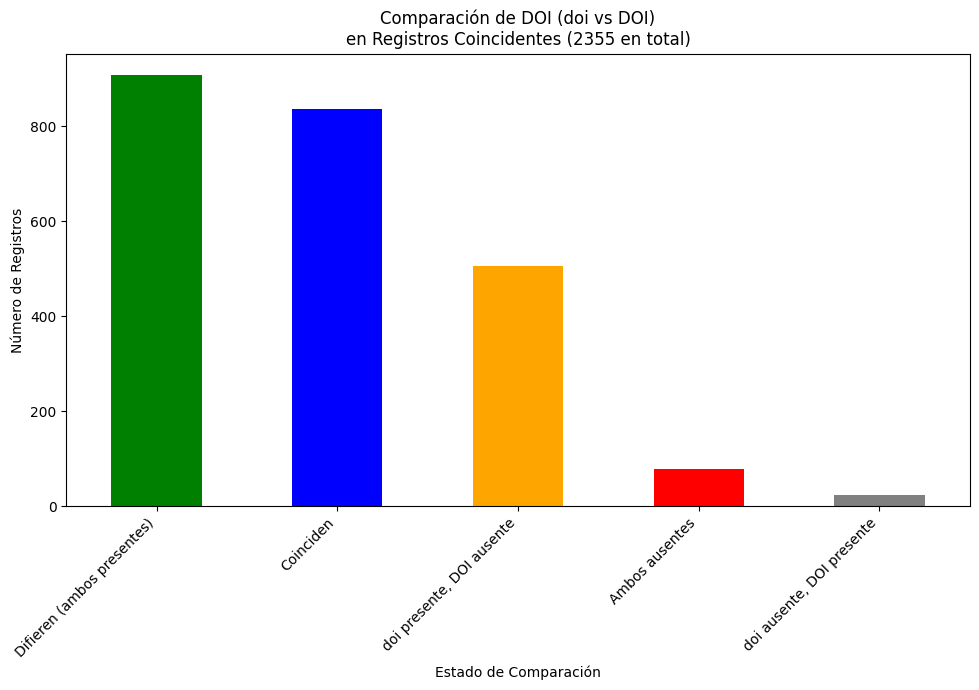

URL_estado_comparacion
Difieren (ambos presentes)    2149
url presente, URL ausente      188
Coinciden                       18
Name: count, dtype: int64


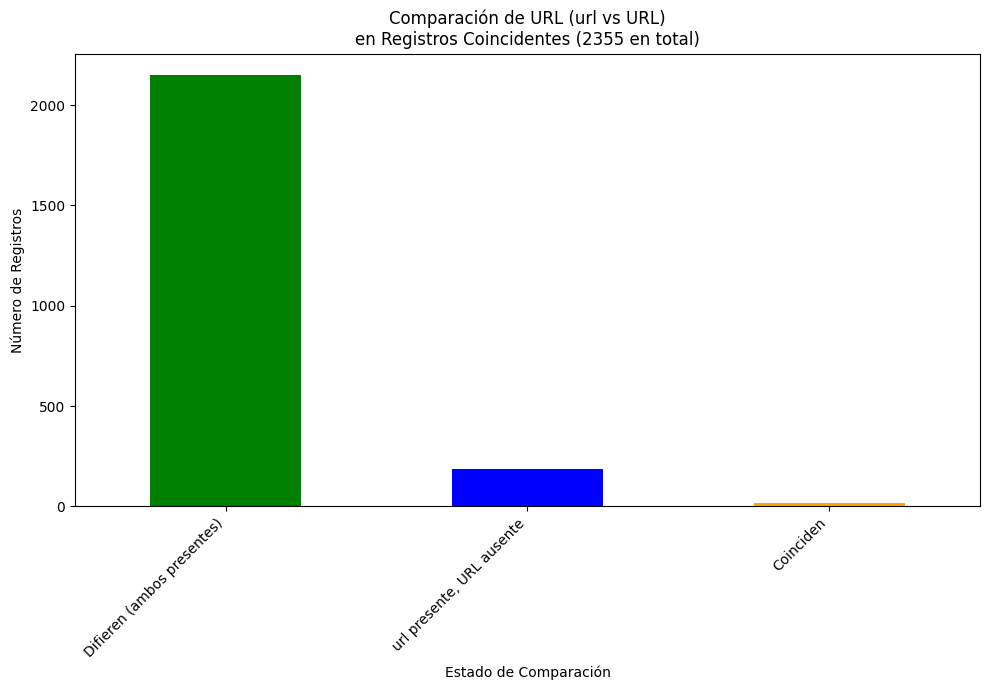

URL DOI_estado_comparacion
Difieren (ambos presentes)       1924
url_doi presente, URL ausente     175
Coinciden                         153
url_doi ausente, URL presente      90
Ambos ausentes                     13
Name: count, dtype: int64


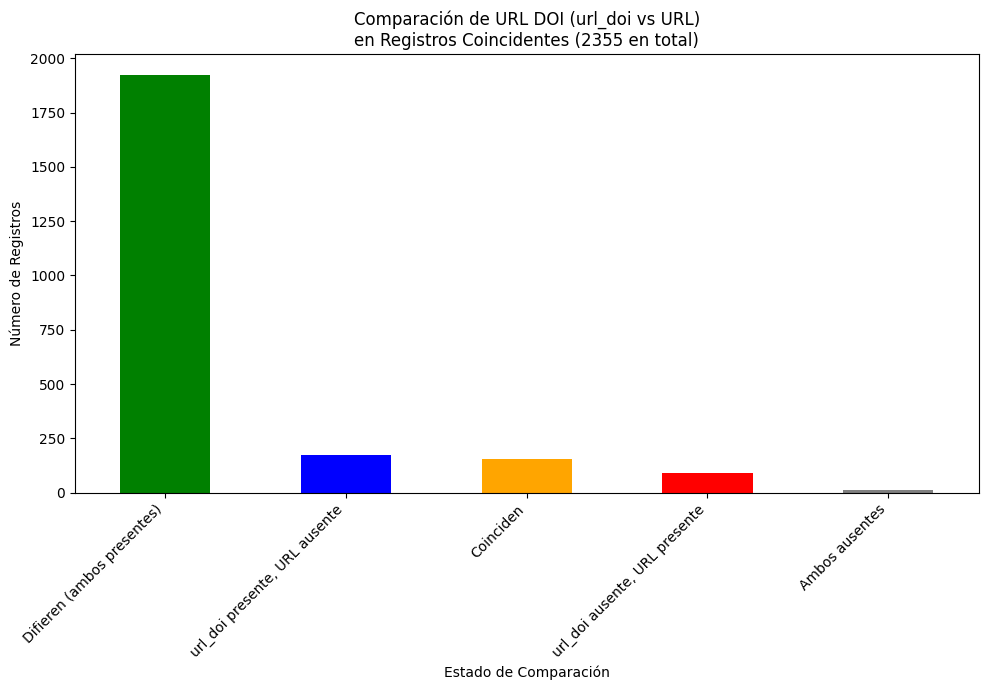

TITULO_estado_comparacion
Coinciden    2355
Name: count, dtype: int64


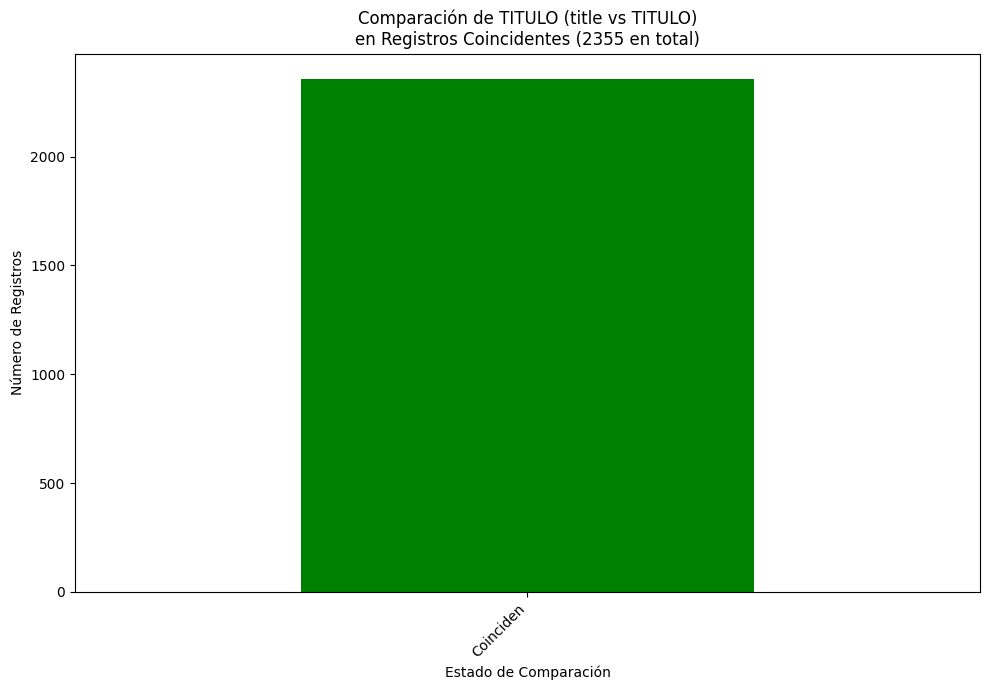

Abstract/Resumen_estado_comparacion
Difieren (ambos presentes)            1330
Coinciden                              924
abstract presente, RESUMEN ausente      76
abstract ausente, RESUMEN presente      22
Ambos ausentes                           3
Name: count, dtype: int64


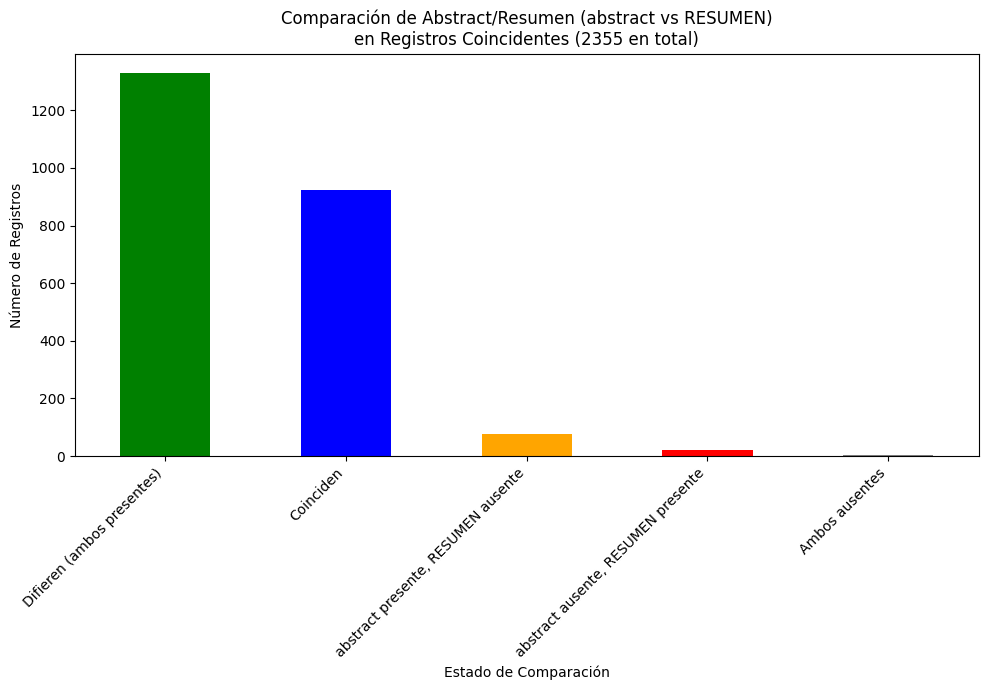

Keywords_estado_comparacion
Difieren (ambos presentes)          1886
key_words ausente, KEYS presente     252
Coinciden                            134
key_words presente, KEYS ausente      51
Ambos ausentes                        32
Name: count, dtype: int64


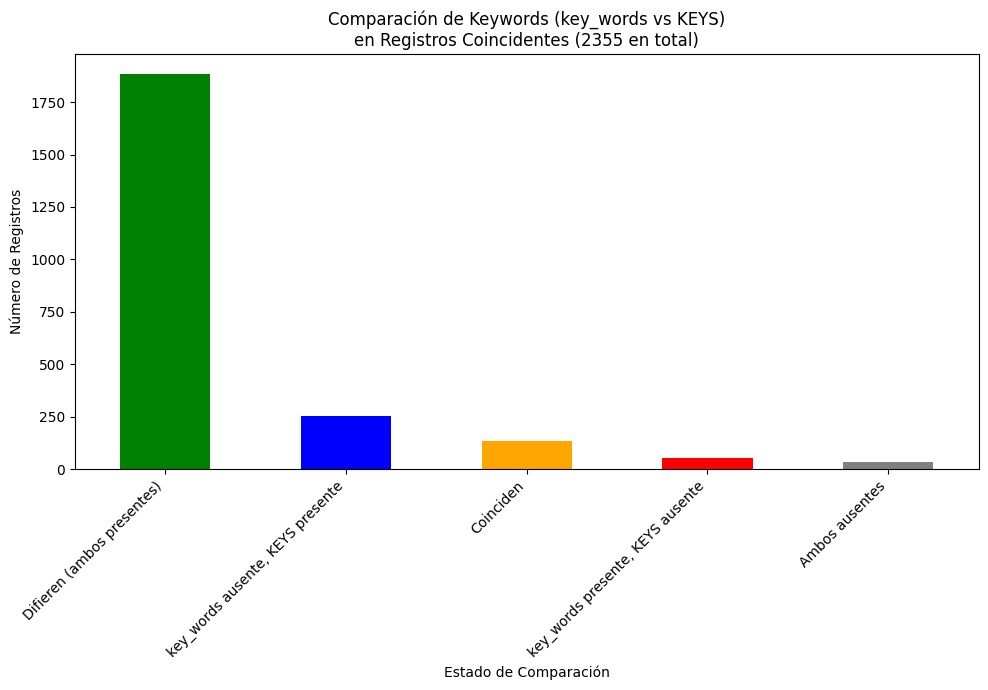

volume_estado_comparacion
Coinciden                           1547
Difieren (ambos presentes)           451
volume ausente, VOLUMEN presente     326
Ambos ausentes                        18
volume presente, VOLUMEN ausente      13
Name: count, dtype: int64


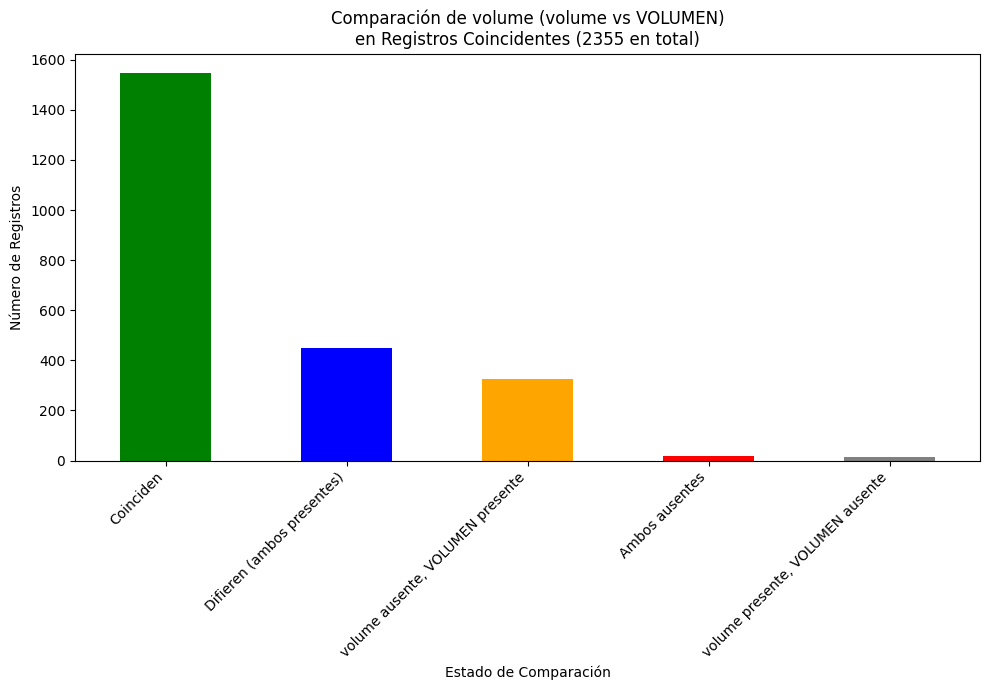

ISSN_estado_comparacion
Difieren (ambos presentes)     1208
Coinciden                       696
issn ausente, ISSN presente     232
issn presente, ISSN ausente     137
Ambos ausentes                   82
Name: count, dtype: int64


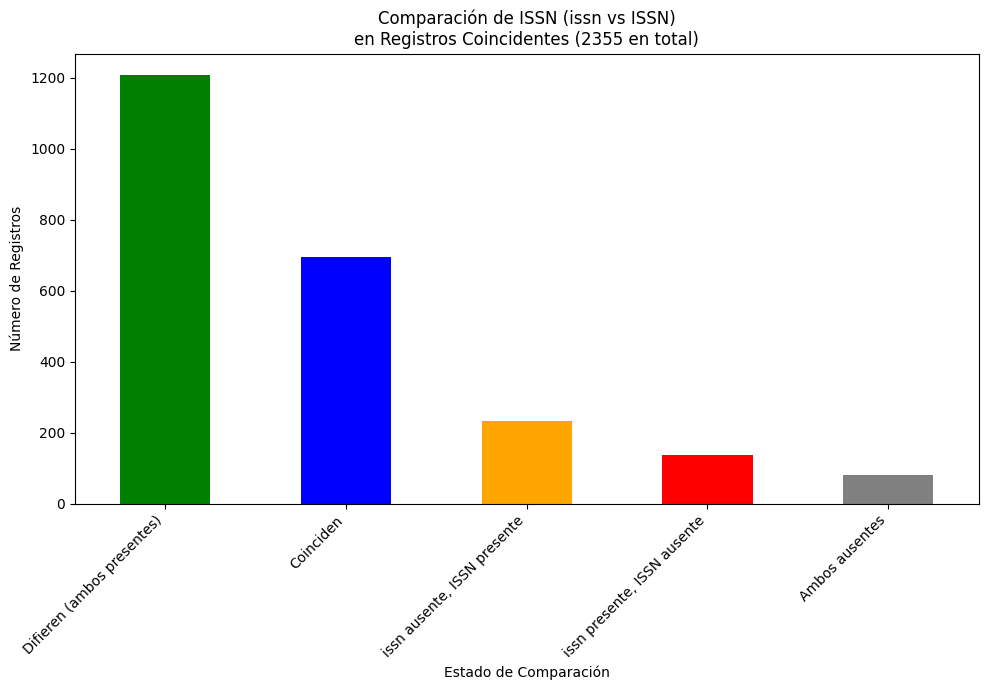

magazine_estado_comparacion
magazine presente, EDITORIAL ausente    1917
Ambos ausentes                           354
magazine ausente, EDITORIAL presente      46
Difieren (ambos presentes)                36
Coinciden                                  2
Name: count, dtype: int64


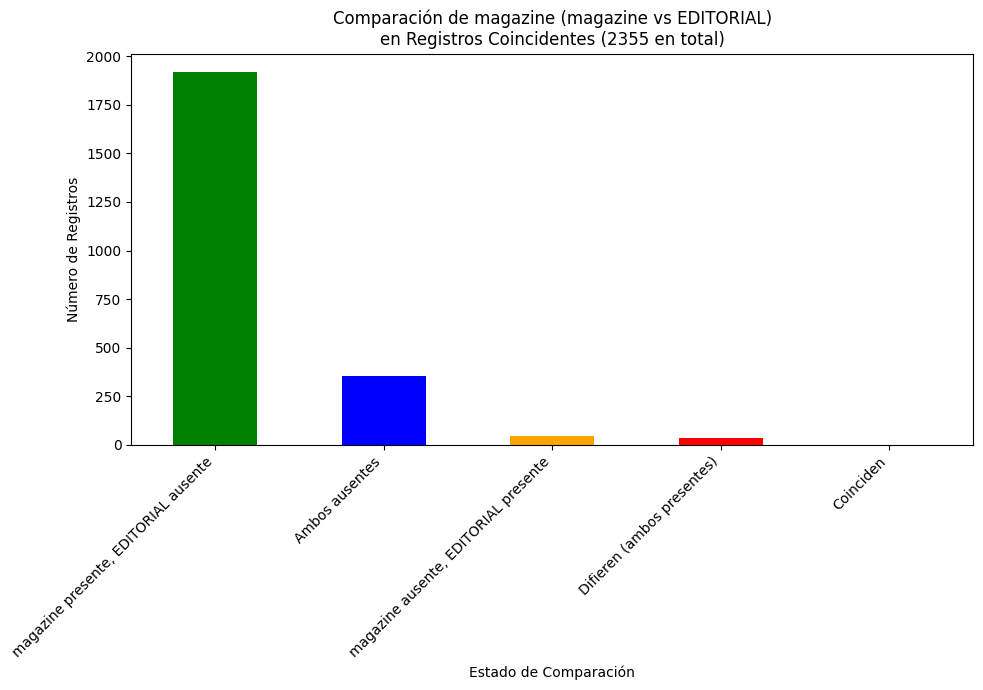

DATE_estado_comparacion
Difieren (ambos presentes)                      1702
coverDate presente, FECHAPUBLICACION ausente     328
Coinciden                                        325
Name: count, dtype: int64


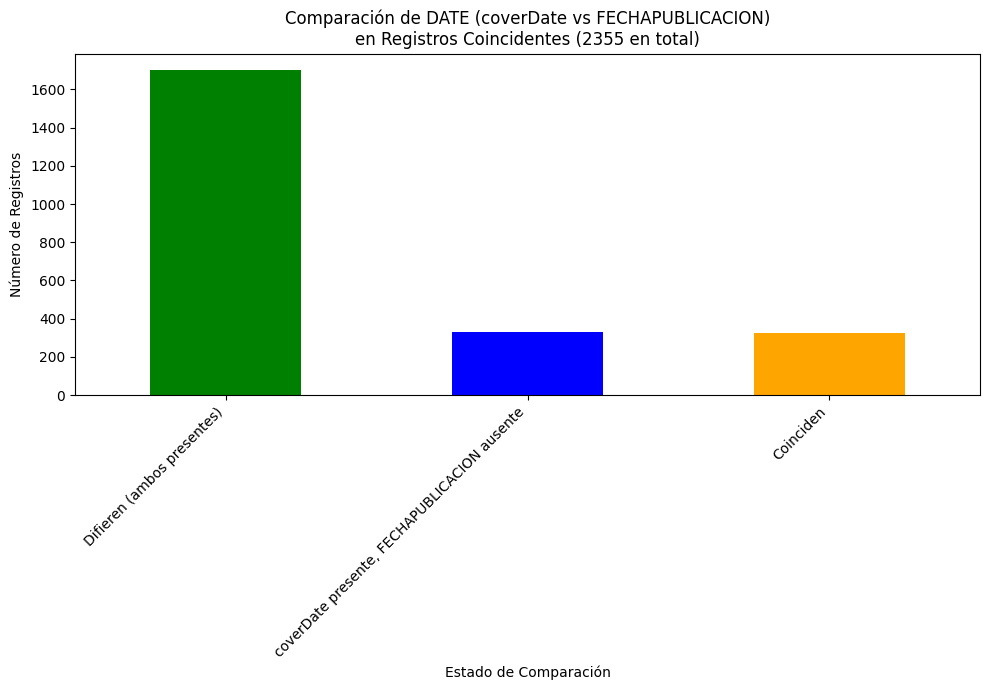

Año_estado_comparacion
Difieren (ambos presentes)    2355
Name: count, dtype: int64


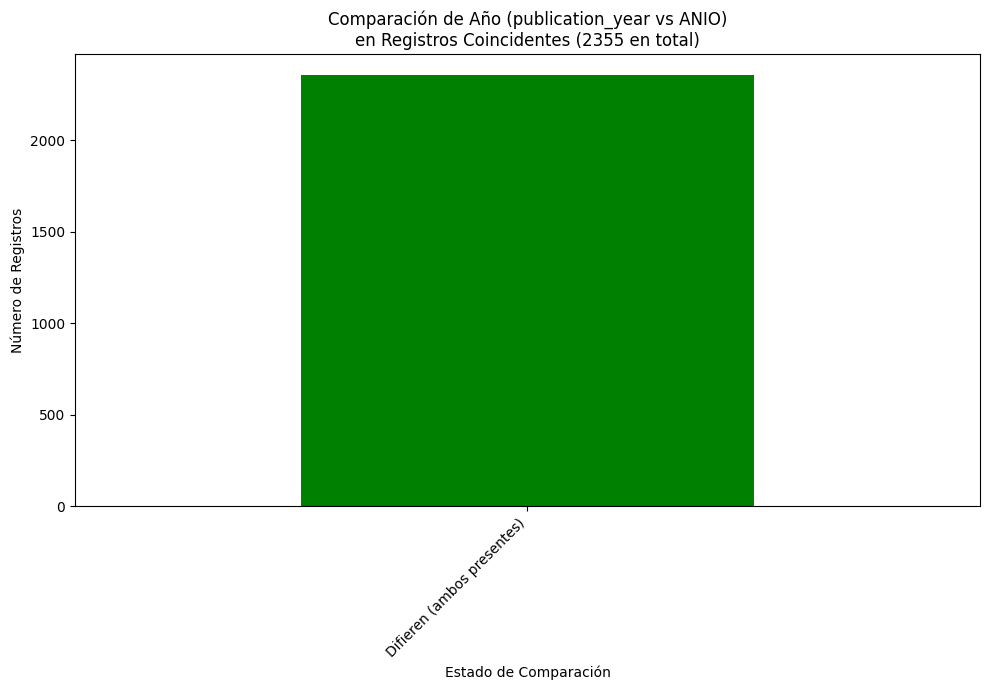

page_raw_estado_comparacion
page_raw ausente, PAGINAS presente    992
Difieren (ambos presentes)            702
Coinciden                             622
page_raw presente, PAGINAS ausente     23
Ambos ausentes                         16
Name: count, dtype: int64


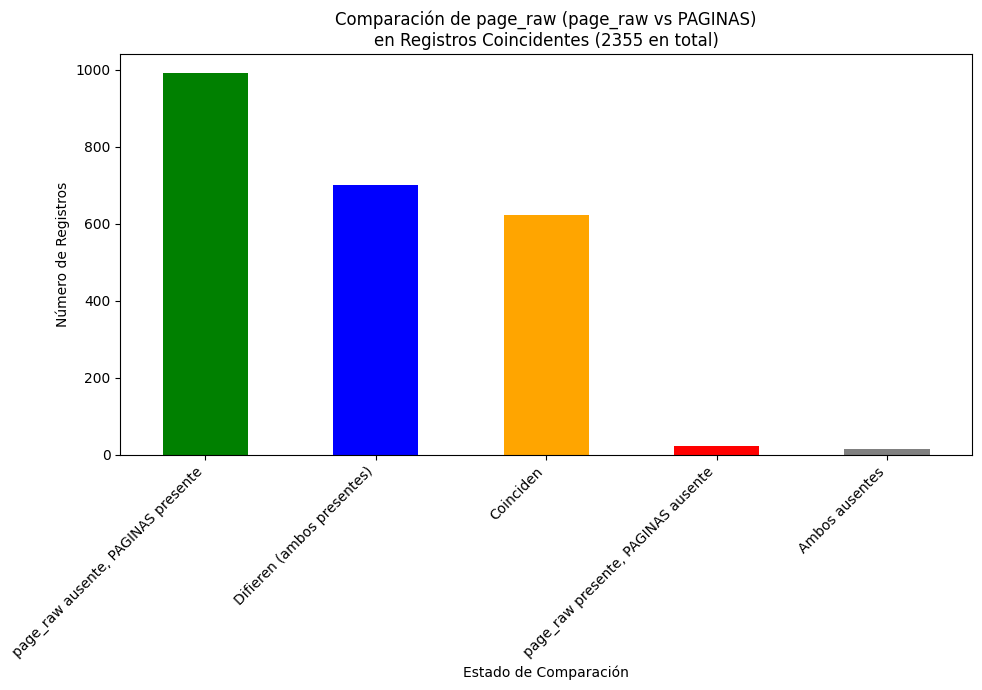

page_count_estado_comparacion
Difieren (ambos presentes)              1322
page_count ausente, PAGINAS presente     994
page_count presente, PAGINAS ausente      23
Ambos ausentes                            16
Name: count, dtype: int64


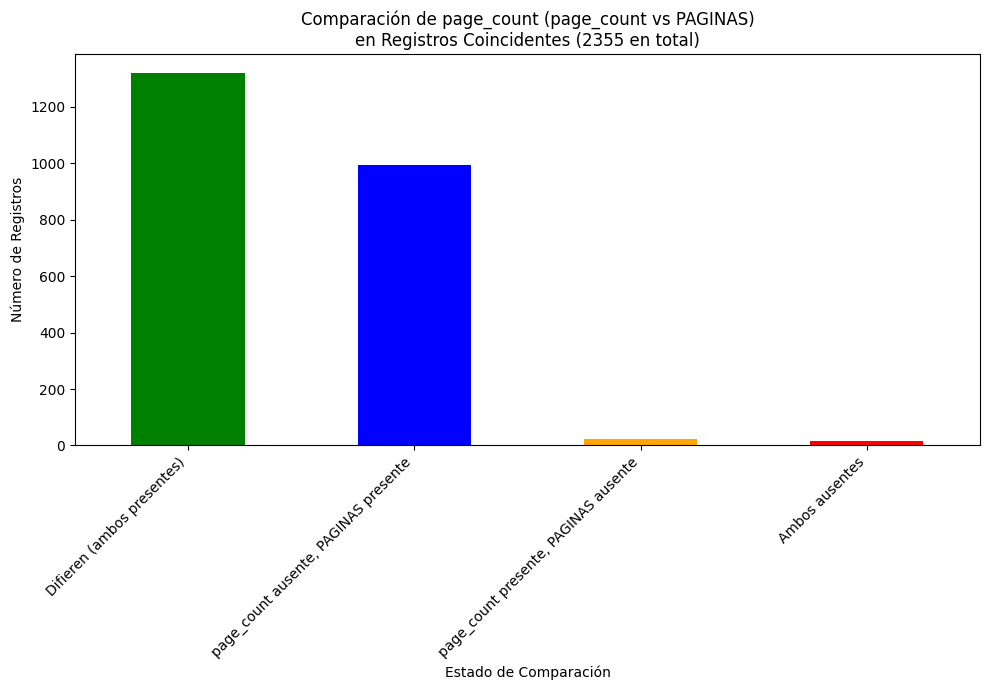

SJR_estado_comparacion
Difieren (ambos presentes)                  1575
scimago_factor_SJR ausente, SJR presente     319
scimago_factor_SJR presente, SJR ausente     277
Ambos ausentes                               182
Coinciden                                      2
Name: count, dtype: int64


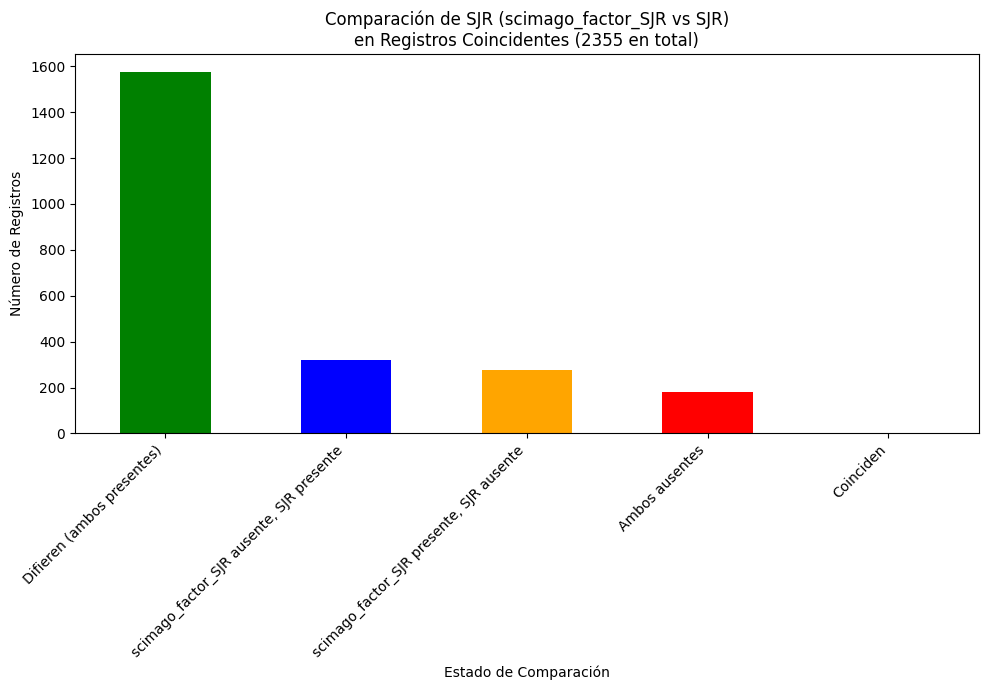

SJR quartile_estado_comparacion
Coinciden                                              1109
Difieren (ambos presentes)                              662
scimago_SJR_Best_Quartile ausente, CUARTIL presente     336
Ambos ausentes                                          147
scimago_SJR_Best_Quartile presente, CUARTIL ausente     101
Name: count, dtype: int64


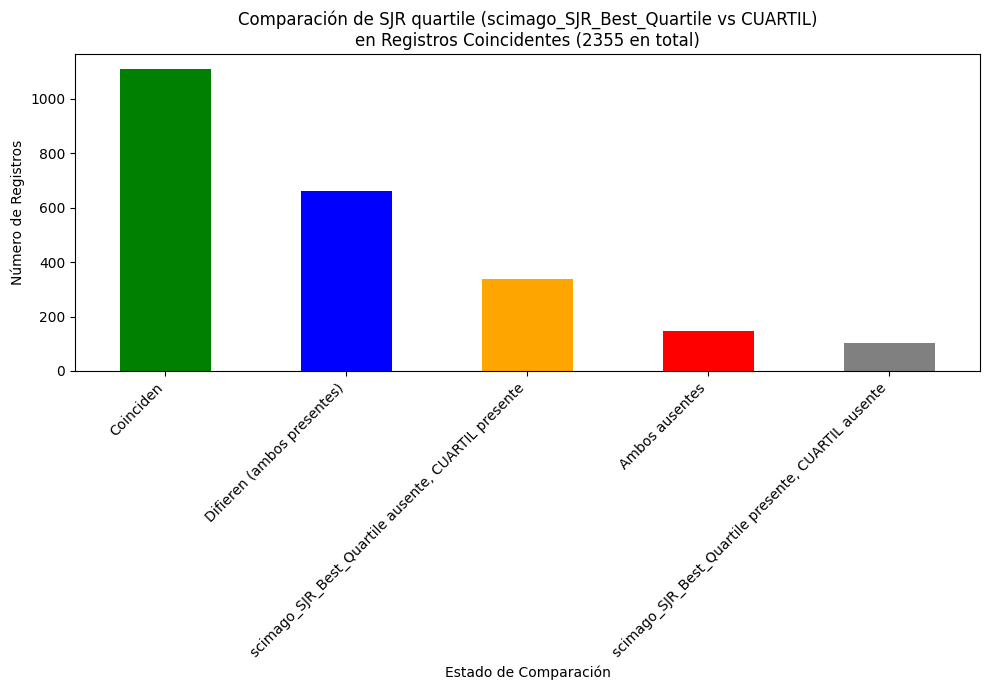


--- Resumen Final ---
Filas en df_scrap original: 4605
Filas en df_all original: 4605
Filas en result (merge): 2355
Filas en df_matched (coincidentes según 'title'): 2355
Filas en df_api_no_match: 2517
Filas en df_all_no_match: 2204


In [66]:
show_description(df_matched_preprocesado)